In [ ]:
#here we test all the components.



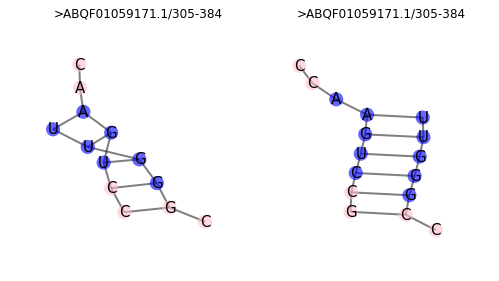

In [5]:
'''
first we test the core/interface extractor, since it is most essential
'''
%matplotlib inline
from testgraphs import get_graphs
import utils.draw as myutils
import extract

#get a graph
gr=get_graphs()
g=gr.next()
g=extract.preprocess(g)
#lets see..
a=extract.extract_core_and_interface(1,g,[2,3],[2])
myutils.drawgraphs([ a[0].graph,a[1].graph ])


interface: 1029636


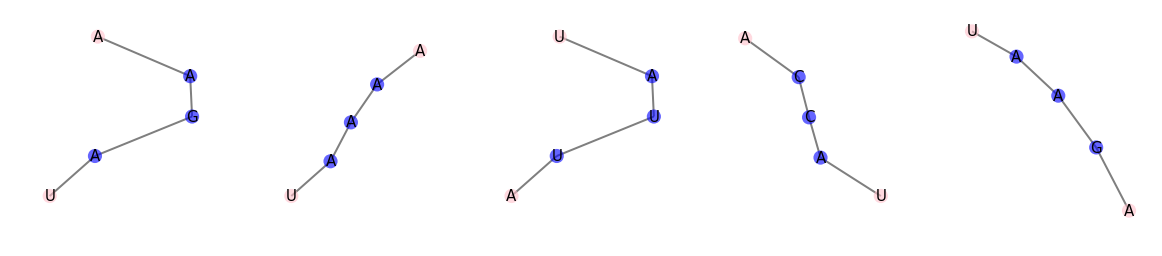

interface: 103429


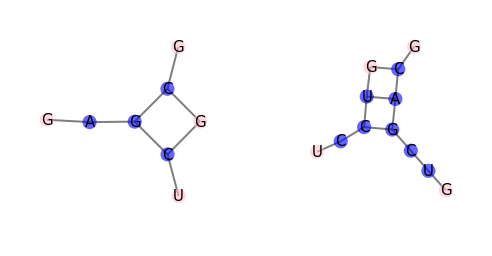

interface: 820746


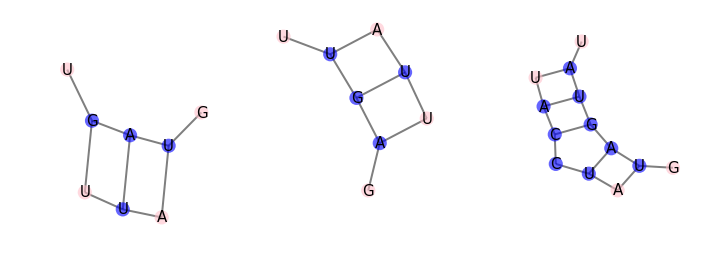

SGDClassifier(alpha=0.000138860414201, average=False, class_weight='auto',
       epsilon=0.1, eta0=2.63378403483, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=29, n_jobs=4,
       penalty='l1', power_t=0.570482509427, random_state=None,
       shuffle=True, verbose=0, warm_start=False)


In [6]:
'''
second is reading a grammar and training an estimator
'''
%matplotlib inline
from testgraphs import get_graphs
import utils.draw as myutils
from adaptiveMHgraphsampler import adaptiveMHgraphsampler



radius_list=[2,4]
thickness_list=[2]
sampler=adaptiveMHgraphsampler()
sampler.train_estimator_and_extract_grammar(get_graphs(),
                radius_list,thickness_list,n_jobs=4)


myutils.draw_grammar(sampler,3)
print sampler.estimator
sampler.save('data/demo.ge')


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10 µs


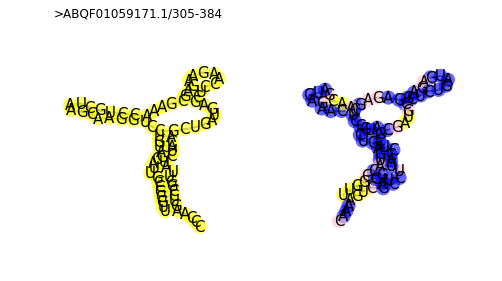

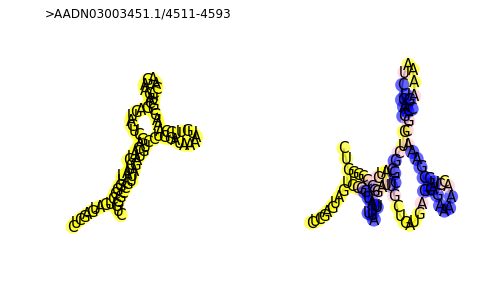

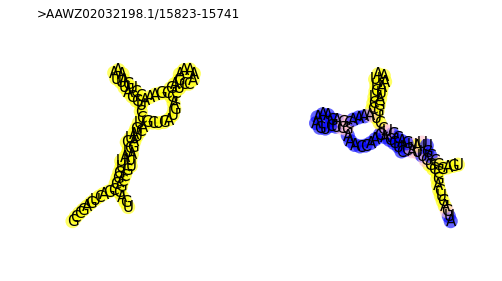

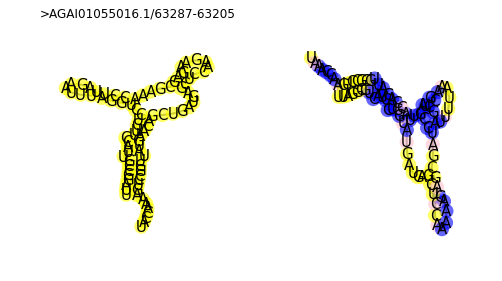

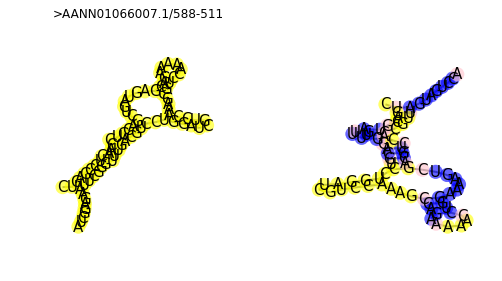

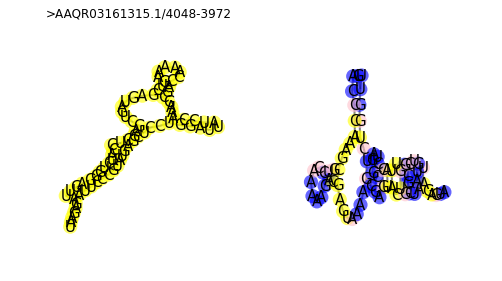

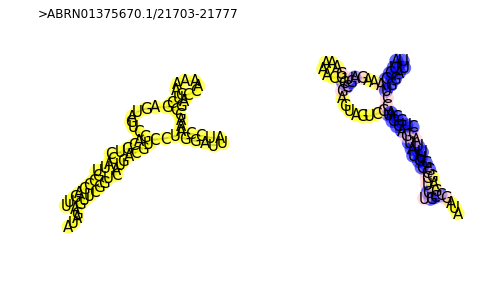

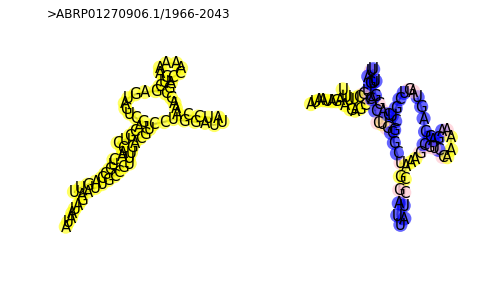

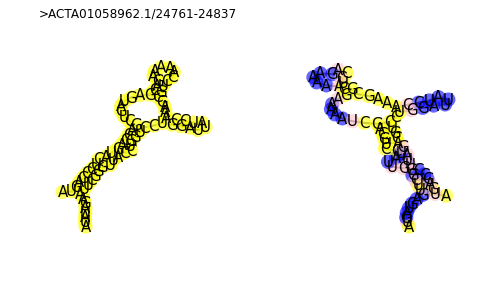

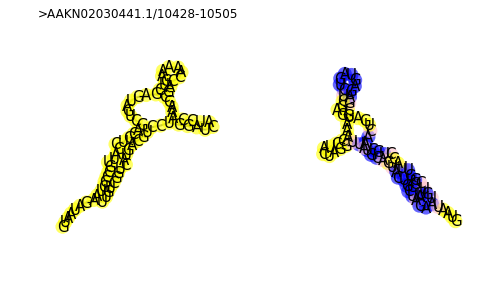

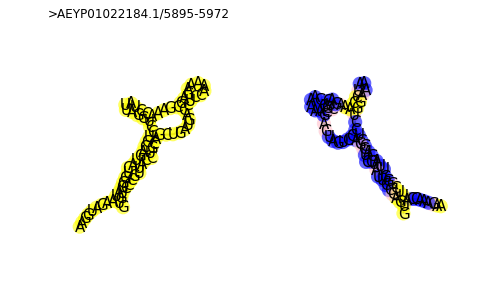

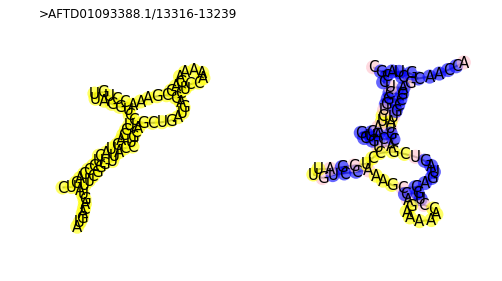

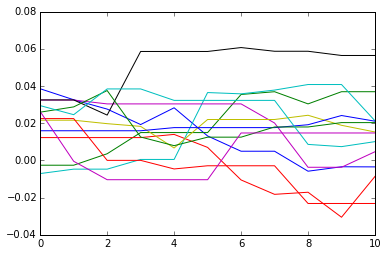

In [7]:
'''
now lets see if we can improve graphs
'''
%time
%matplotlib inline
from testgraphs import get_graphs
import utils.draw as myutils
from adaptiveMHgraphsampler import adaptiveMHgraphsampler
import itertools
import matplotlib.pyplot as plt


sampler=adaptiveMHgraphsampler()
sampler.load('data/demo.ge')
graphs=get_graphs()
graphs = sampler.mass_improve_random(graphs,times=11,n_jobs=4)


history=[]
oldgr= itertools.islice(get_graphs(),12)
for (old,new) in itertools.izip(oldgr,graphs): 
    history.append(new.scorehistory)
    myutils.drawgraphs([old,new])
    
    
t = range(11)
for h in history:
    plt.plot(t, h)
plt.show()


# to self:
#goto improve_loop to fix bug
#test :if the anti graph growing thing worked
#test :all the stopping criterions to see how likely each one is
# check out project options
